<a href="https://colab.research.google.com/github/yanamushka/ML-course/blob/main/HW_2_5_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [381]:
df = pd.read_csv('cars.csv')
df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [382]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.nunique

In [383]:
df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [384]:
df.select_dtypes(include = 'object')

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [385]:
df.select_dtypes(include = 'object').nunique()

Brand           11
Model           58
Fuel_Type        2
Transmission     2
Owner_Type       3
dtype: int64

# Висновок
В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (Fuel_type, Transmission)
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 1 колонка, в якій є відношення порядку first, second, third

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [386]:
X = df.drop(columns = 'Price')

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, df.Price, test_size = 0.2, random_state=12)

In [388]:
y_train

83    1600000
55    2600000
26    3200000
54     650000
19    2500000
       ...   
3      600000
2     2500000
6      900000
27    2800000
75    3500000
Name: Price, Length: 80, dtype: int64

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [389]:
fuel_codes = {'Petrol':1, 'Diesel':0}
X_train['Fuel_codes'] = X_train.Fuel_Type.map(fuel_codes)
X_test['Fuel_codes'] = X_test.Fuel_Type.map(fuel_codes)

In [390]:
transmission_codes = {'Automatic':1, 'Manual':0}

In [391]:
X_train['Transmission_codes'] = X_train.Transmission.map(transmission_codes)
X_test['Transmission_codes'] = X_test.Transmission.map(transmission_codes)

In [392]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [393]:
X_train[enc.categories_[0]] = enc.transform(X_train[['Brand']]).toarray()

In [394]:
X_test[enc.categories_[0]] = enc.transform(X_test[['Brand']]).toarray()

In [395]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Для колонки Owner Type категоріальні змінні замінюються індексами 0, 1, 2 відповідно до порядку категорій поданих в списку категорії

In [396]:
pd.set_option('display.max_columns', 100)
display(X_train.head())
display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


Очікуваний результат після трансформацій:

In [397]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [437]:
numeric = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
X_train_numeric = X_train[numeric]
X_test_numeric = X_test[numeric]
numeric_df = pd.concat([X_train_numeric, y_train], axis = 1)

numeric_df.corr()['Price'][abs(numeric_df.corr()['Price'])>0.5]

Mileage   -0.638404
Engine     0.710561
Power      0.849137
Price      1.000000
Name: Price, dtype: float64

Спостерігаємо позитивну кореляцію з цільовою змінною (ціною на автомобіль) у наступних показників:  об'єм двигуна, потужність. Також бачимо залежність між кількістю проїханих миль та ціною, проте у даному випадку кореляція від'ємна

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [439]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [440]:
def train_model_show_rmse(inputs, targets):
  model = LinearRegression().fit(inputs, targets)
  predictions = model.predict(inputs)
  rmse = mean_squared_error(targets, predictions, squared=False)
  print('RMSE:', rmse)
  return model

In [448]:
model = LinearRegression().fit(X_train_numeric, y_train)
predictions_train= model.predict(X_train_numeric)
predictions_test = model.predict(X_test_numeric)
rmse_train = mean_squared_error(y_train, predictions_train, squared=False )
rmse_test = mean_squared_error(y_test, predictions_test, squared=False )


In [449]:
rmse_train,rmse_test

(516330.6226410484, 421183.67770850565)

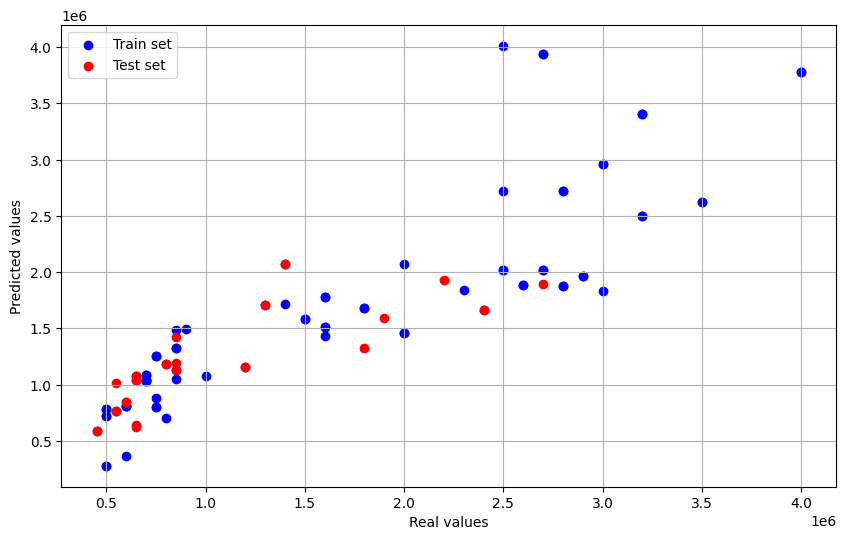

In [442]:
plt.figure(figsize=(10,6))
plt.scatter(y_train,predictions_train, color = 'blue', label = 'Train set')
plt.scatter(y_test,predictions_test, color = 'red', label = 'Test set')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.legend()
plt.grid(True)
plt.show()


### Висновок

Бачимо, що відхилення передбачення для тренувального сету більше ніж для тестового. Також графічно спостерігаємо, що  для більших значень відхилення збільшується, тому можливо причиною є те що тестова вибірка знаходиться щільніше до початку координат

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [450]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_numeric)

StandardScaler()

In [451]:
scaled_train= scaler.transform(X_train_numeric)
scaled_test = scaler.transform(X_test_numeric)


In [469]:
cat_data = X_train.drop(columns = numeric)

In [476]:
categorical = ['Fuel_codes', 'Transmission_codes', 'Audi', 'BMW', 'Ford', 'Honda',
       'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Owner_Type_Codes']

In [477]:
categorical_data = X_train[categorical]

In [491]:
inputs = np.concatenate((scaled_train, categorical_data), axis=1)

In [481]:
model1 = train_model_show_rmse(inputs, y_train)

RMSE: 210342.80162046402


In [487]:
weights_df = pd.DataFrame({'feature':np.append(numeric+categorical,1),
                           'weight':np.append(model.coef_, model1.intercept_)})

In [488]:
weights_df.sort_values('weight', ascending = False)

,feature,weight
20,1,1.604276e+06
8,Audi,7.588030e+05
15,Mercedes,7.339747e+05
9,BMW,7.303268e+05
4,Power,5.000005e+05
7,Transmission_codes,2.363676e+05
17,Toyota,1.304575e+05
19,Owner_Type_Codes,6.627831e+04
5,Seats,-1.744049e+03
0,Year,-1.160426e+04


## Висновок
Бачимо, що пробіг, кількість сидінь мають негативні коефіцієнти в той час як типово дорожчі машини та тип трансмісії автомат мають позитивні коефіцієнти

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [505]:
col = numeric + categorical

In [510]:
inputs_df = pd.DataFrame(inputs, columns = col)


In [511]:
import statsmodels.api as sm

Y = y_train.values
X = inputs
X = sm.add_constant(inputs_df)
model = sm.OLS(Y,X)
results = model.fit()
results.params.sort_values(ascending = False)

const                 1.470586e+06
Audi                  8.924927e+05
Mercedes              8.676644e+05
BMW                   8.640165e+05
Power                 5.000005e+05
Toyota                2.641471e+05
Transmission_codes    2.363676e+05
Owner_Type_Codes      6.627831e+04
Tata                  7.185463e+03
Seats                -1.744049e+03
Year                 -1.160426e+04
Engine               -2.468308e+04
Honda                -5.531287e+04
Kilometers_Driven    -9.971396e+04
Volkswagen           -1.250955e+05
Mileage              -1.318846e+05
Ford                 -1.714085e+05
Maruti               -2.605266e+05
Fuel_codes           -3.706075e+05
Hyundai              -3.713536e+05
Mahindra             -4.412230e+05
dtype: float64

In [512]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.34e-34
Time:                        01:44:29   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.471e+06   7.09

Отже, коефіцієнти які будуть значущими для даної моделі: Mileage, Power, Fuel_codes, Transmission_codes, Audi, BMW,Hyundai,Mahindra,Mercedes Toyota           


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [517]:

X_znach = inputs_df[['Mileage','Power','Fuel_codes','Transmission_codes','Audi','BMW','Hyundai','Mahindra','Mercedes', 'Toyota']]
X_znach = sm.add_constant(X_znach)
model_znach = sm.OLS(Y,X_znach.values)
results = model_znach.fit()


In [518]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     142.1
Date:                Thu, 30 May 2024   Prob (F-statistic):           5.99e-42
Time:                        01:49:08   Log-Likelihood:                -1098.5
No. Observations:                  80   AIC:                             2219.
Df Residuals:                      69   BIC:                             2245.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.341e+06   6.64e+04     20.190      0.0

Показники R-квадрат та Adj. R-квадрат змінились, але різниця не значна

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [523]:
X_znach = inputs_df[['Mileage','Power','Fuel_codes','Transmission_codes','Audi','BMW','Hyundai','Mahindra','Mercedes', 'Toyota','Ford','Volkswagen']]
X_znach = sm.add_constant(X_znach)
X = sm.add_constant(X_znach)
model_0_25 = sm.OLS(Y,X_znach.values)
results = model_0_25.fit()
results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     115.6
Date:                Thu, 30 May 2024   Prob (F-statistic):           7.11e-40
Time:                        01:52:00   Log-Likelihood:                -1098.3
No. Observations:                  80   AIC:                             2223.
Df Residuals:                      67   BIC:                             2254.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.334e+06    8.4e+04     15.885      0.0

З додаванням показників зменшилось значення R-квадрат та  Adj. R-квадрат, що пов'язано з тим що були додані категоріальні змінні до моделі (більше марок машин) і відповідно це погіршує точність самої моделі адже для інших марок таке передбачення буде викривленим. Для використання я б обрала першу модель, що базувалась лише на числових змінних та пояснювала 95.9% варіації у залежній змінній